# Template

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



def styled(obj, caption="", dots=False):
    # If the object is a Series, convert it to a DataFrame
    if isinstance(obj, pd.Series):
        obj = obj.to_frame().T  # Convert Series to one-row DataFrame

    # If the number of rows or columns is small, display the table as is
    if isinstance(obj, pd.DataFrame) and obj.shape[0] <= 3 and obj.shape[1] <= 3:
        return (
            obj.style
            .set_properties(**{'text-align': 'left'})
            .set_table_styles([
                {'selector': 'th', 'props': [('text-align', 'left')]},
                {'selector': '.row_heading', 'props': [('text-align', 'left')]}
            ])
            .set_caption(caption)
        )

    # Handle dots view for large DataFrames
    if dots and isinstance(obj, pd.DataFrame) and len(obj) > 6:
        head = obj.head(3)
        tail = obj.tail(3)

        # Create a DataFrame with the same columns and '...' as a row
        ellipsis_row = pd.DataFrame([['...'] * obj.shape[1]], columns=obj.columns)
        ellipsis_row.index = ['...']  # Set a placeholder index

        # Concatenate with original indexes preserved
        obj = pd.concat([head, ellipsis_row, tail])

    return (
        obj.style
        .set_properties(**{'text-align': 'left'})
        .set_table_styles([
            {'selector': 'th', 'props': [('text-align', 'left')]},
            {'selector': '.row_heading', 'props': [('text-align', 'left')]}
        ])
        .set_caption(caption)
    )



# Data

In [2]:
import json
import pandas as pd

# Load JSON / JSONL
path = "data.jsonl"   # change to .jsonl if needed

records = []
with open(path, "r", encoding="utf-8") as f:
    for line in f:
        records.append(json.loads(line))

df = pd.DataFrame(records)

# Create count table
class_counts = (
    df["time_complexity"]
    .value_counts()
    .reset_index()
)

class_counts.columns = ["Class Name", "Count"]

styled(class_counts)


,Class Name,Count
0,O(log n),6672
1,O(n log n),6672
2,O(n),6672
3,O(1),6672
4,other complexity,6671
5,O(n²),6671


In [3]:
import json
import pandas as pd

path = "data.jsonl"   

records = []
with open(path, "r", encoding="utf-8") as f:
    for line in f:
        records.append(json.loads(line))

df = pd.DataFrame(records)
styled(df.head())


,id,language,code,time_complexity,complexity_class
0,009514,python,def ilog2_mtfjvt(n): if n <= 0: return None k = 0 while (1 << (k + 1)) <= n: k += 1 return k,O(log n),1
1,037294,python,"def n2logn_ytvjla(arr_kpytvm, x): a = sorted(arr_kpytvm) hits = 0 for i in range(len(a)): for j in range(len(a)): lo, hi = 0, len(a) - 1 while lo <= hi: mid = (lo + hi) // 2 if a[mid] == x: hits += 1 break if a[mid] < x: lo = mid + 1 else: hi = mid - 1 return hits",other complexity,5
2,032631,python,"def count_inversions_inblzo(arr_itjyxm): inv = 0 for i in range(len(arr_itjyxm)): for j in range(i + 1, len(arr_itjyxm)): if arr_itjyxm[i] > arr_itjyxm[j]: inv += 1 return inv",O(n²),4
3,038512,python,"def knap_bmunqi(w, v, cap, i=0): if i == len(w) or cap <= 0: return 0 best = knap_bmunqi(w, v, cap, i+1) if w[i] <= cap: take = v[i] + knap_bmunqi(w, v, cap - w[i], i+1) if take > best: best = take return best",other complexity,5
4,035526,python,def is_prime_sqrt_sruedh(n): if n < 2: return False i = 2 while i * i <= n: if n % i == 0: return False i += 1 return True,other complexity,5


In [4]:
df.shape, df.columns.tolist()

((40030, 5), ['id', 'language', 'code', 'time_complexity', 'complexity_class'])

# Data After Adding Features

In [5]:
import json
import pandas as pd

path = "data_features.jsonl"   

records = []
with open(path, "r", encoding="utf-8") as f:
    for line in f:
        records.append(json.loads(line))

df2 = pd.DataFrame(records)
styled(df2.head())


,id,language,code,time_complexity,complexity_class,representation,num_loops,num_for,num_while,max_loop_depth,has_nested_loops,loop_bound_type,has_log_update,uses_sort,recursion_flag,num_recursive_calls,has_break,has_continue,has_early_return,num_return,uses_comprehension,uses_generator,num_function_calls,uses_list,uses_dict,uses_set,uses_tuple
0,009514,python,def ilog2_mtfjvt(n): if n <= 0: return None k = 0 while (1 << (k + 1)) <= n: k += 1 return k,O(log n),1,ast_static_complete,1,0,1,1,0,linear,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0
1,037294,python,"def n2logn_ytvjla(arr_kpytvm, x): a = sorted(arr_kpytvm) hits = 0 for i in range(len(a)): for j in range(len(a)): lo, hi = 0, len(a) - 1 while lo <= hi: mid = (lo + hi) // 2 if a[mid] == x: hits += 1 break if a[mid] < x: lo = mid + 1 else: hi = mid - 1 return hits",other complexity,5,ast_static_complete,3,2,1,3,1,linear,0,1,0,0,1,0,0,1,0,0,6,0,0,0,1
2,032631,python,"def count_inversions_inblzo(arr_itjyxm): inv = 0 for i in range(len(arr_itjyxm)): for j in range(i + 1, len(arr_itjyxm)): if arr_itjyxm[i] > arr_itjyxm[j]: inv += 1 return inv",O(n²),4,ast_static_complete,2,2,0,2,1,linear,0,0,0,0,0,0,0,1,0,0,4,0,0,0,0
3,038512,python,"def knap_bmunqi(w, v, cap, i=0): if i == len(w) or cap <= 0: return 0 best = knap_bmunqi(w, v, cap, i+1) if w[i] <= cap: take = v[i] + knap_bmunqi(w, v, cap - w[i], i+1) if take > best: best = take return best",other complexity,5,ast_static_complete,0,0,0,0,0,unknown,0,0,1,2,0,0,0,2,0,0,3,0,0,0,0
4,035526,python,def is_prime_sqrt_sruedh(n): if n < 2: return False i = 2 while i * i <= n: if n % i == 0: return False i += 1 return True,other complexity,5,ast_static_complete,1,0,1,1,0,linear,0,0,0,0,0,0,1,3,0,0,0,0,0,0,0


In [6]:
df2.shape, df2.columns.tolist()

((40030, 27),
 ['id',
  'language',
  'code',
  'time_complexity',
  'complexity_class',
  'representation',
  'num_loops',
  'num_for',
  'num_while',
  'max_loop_depth',
  'has_nested_loops',
  'loop_bound_type',
  'has_log_update',
  'uses_sort',
  'recursion_flag',
  'num_recursive_calls',
  'has_break',
  'has_continue',
  'has_early_return',
  'num_return',
  'uses_comprehension',
  'uses_generator',
  'num_function_calls',
  'uses_list',
  'uses_dict',
  'uses_set',
  'uses_tuple'])

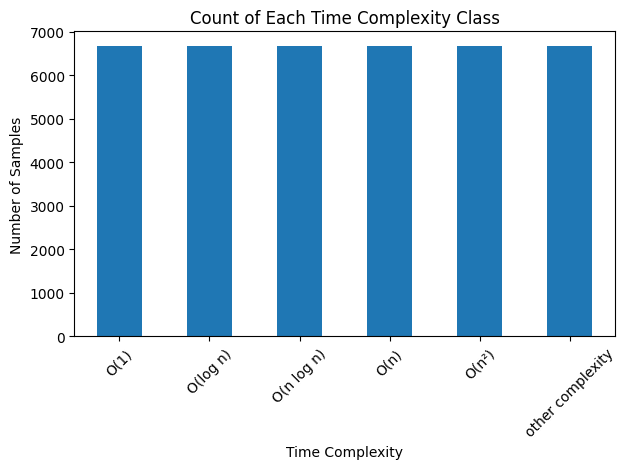

In [7]:
import json
import pandas as pd
import matplotlib.pyplot as plt

# 🔹 UPDATE THIS PATH IF NEEDED
path = "./data_features.jsonl"

records = []
with open(path, "r", encoding="utf-8") as f:
    for line in f:
        records.append(json.loads(line))

df2 = pd.DataFrame(records)

# Count each complexity class
complexity_counts = df2["time_complexity"].value_counts().sort_index()

# Plot
plt.figure()
complexity_counts.plot(kind="bar")
plt.title("Count of Each Time Complexity Class")
plt.xlabel("Time Complexity")
plt.ylabel("Number of Samples")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
